In [8]:
%load_ext autoreload
%autoreload 2
import warnings 
warnings.filterwarnings('ignore')

import lmp
import plotter
import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Summary

The main points of focus of this week are :

1. Compare the CPEB4 analogs to obtain possible differences in **radius of gyration** and **contacts** between them. In particular, we want to compare 12D_CPEB4_D4 vs CPEB4_D4 and 7D_CPEB4 vs CPEB4. 


2. Perform a simplistic minimization of parameters to **maximize the distance between the radius of gyration of the CPEB4 analogs to obtain which I, HPS Scale and epsilon give a clearest difference between the analogs.**


3. Finally, initiate the analysis of multichain simulations, **trying** to find the **interchain contacts** and possibly the **binodals of all analogs**.

### 1. CPEB4 Analogs comparison

The setters of all variations of CPEB4 (CPEB4, CPEB4_D4, 12D_CPEB4_D4, 7D_CPEB4) using my code are :

In [9]:
# d = '/home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4/'
# protein = '12D_CPEB4_D4'
# small_set = lmpsetup.LMPSetup(oliba_wd=d, protein=protein, temper=True)
# small_set.save = 5000
# small_set.temperatures = np.round(np.linspace(300,500,12), 2).tolist()
# small_set.get_hps_pairs()
# small_set.write_hps_files()
# small_set.assert_build()

In [10]:
# d = '/home/adria/perdiux/prod/lammps/dignon/CPEB4_D4/'
# protein = 'CPEB4_D4'
# small_set = lmpsetup.LMPSetup(oliba_wd=d, protein=protein, temper=True)
# small_set.save = 5000
# small_set.temperatures = np.round(np.linspace(300,500,12), 2).tolist()
# small_set.get_hps_pairs()
# small_set.write_hps_files()
# small_set.assert_build()

In [11]:
# d = '/home/adria/perdiux/prod/lammps/dignon/7D_CPEB4/'
# protein = '7D_CPEB4'
# small_set = lmpsetup.LMPSetup(oliba_wd=d, protein=protein, temper=True)
# small_set.save = 5000
# small_set.temperatures = np.round(np.linspace(300,500,12), 2).tolist()
# small_set.get_hps_pairs()
# small_set.write_hps_files()
# small_set.assert_build()

In [12]:
# d = '/home/adria/perdiux/prod/lammps/dignon/CPEB4/'
# protein = 'CPEB4'
# small_set = lmpsetup.LMPSetup(oliba_wd=d, protein=protein, temper=True)
# small_set.save = 5000
# small_set.temperatures = np.round(np.linspace(300,500,12), 2).tolist()
# small_set.get_hps_pairs()
# small_set.write_hps_files()
# small_set.assert_build()

#### General plotter class

In [13]:
plotty = plotter.Plotter()
plotty.index

,Protein,I,Eps,Scale,Name,FullPath
0,12D_CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/12D_CPEB4_D4/x1/1...
1,7D_CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/7D_CPEB4/x1/1.0ls...
2,CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4/x1/1.0ls-10...
3,CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4_D4/x1/1.0ls...
4,CPEB4x50-24,100,80.0,1.0,CPEB4x50-24,/home/adria/data/prod/lammps/CPEB4x50-24
5,CPEB4x50,100,10.0,1.0,1.0ls-100I-10e,/home/adria/data/prod/lammps/CPEB4x50/1.0ls-10...
6,CPEB4x50,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4x50/1.0ls-10...
7,TEST,100,80.0,1.0,7D_CPEB4,/home/adria/data/prod/lammps/TEST/7D_CPEB4
8,TEST,100,80.0,1.0,CPEB4,/home/adria/data/prod/lammps/TEST/CPEB4


We start by plotting **flory's** scaling plots since from it we can get the critical temperature

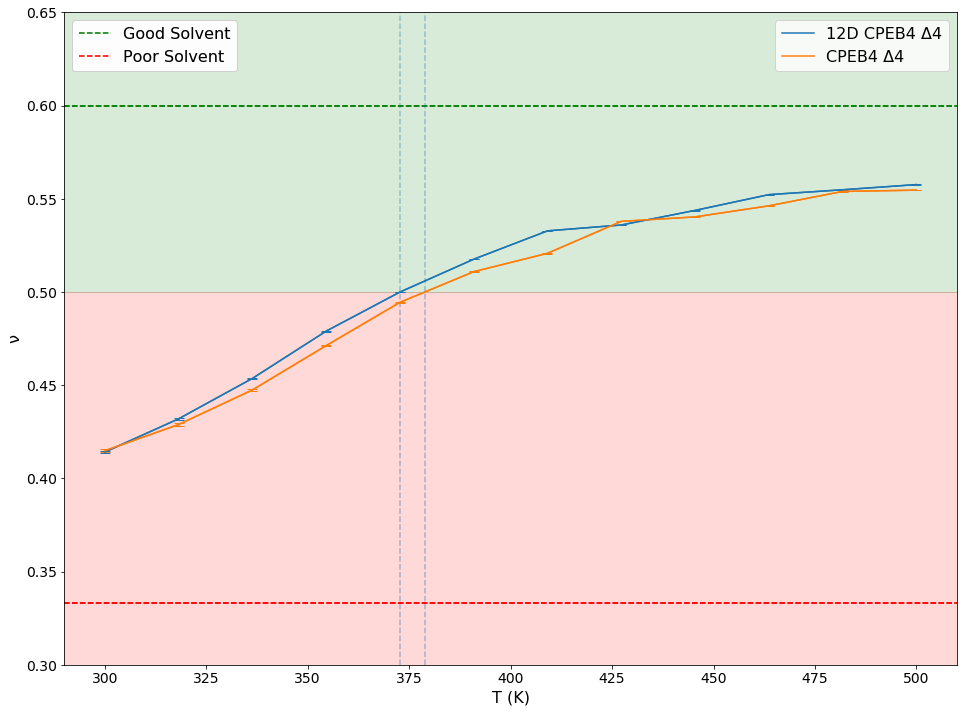

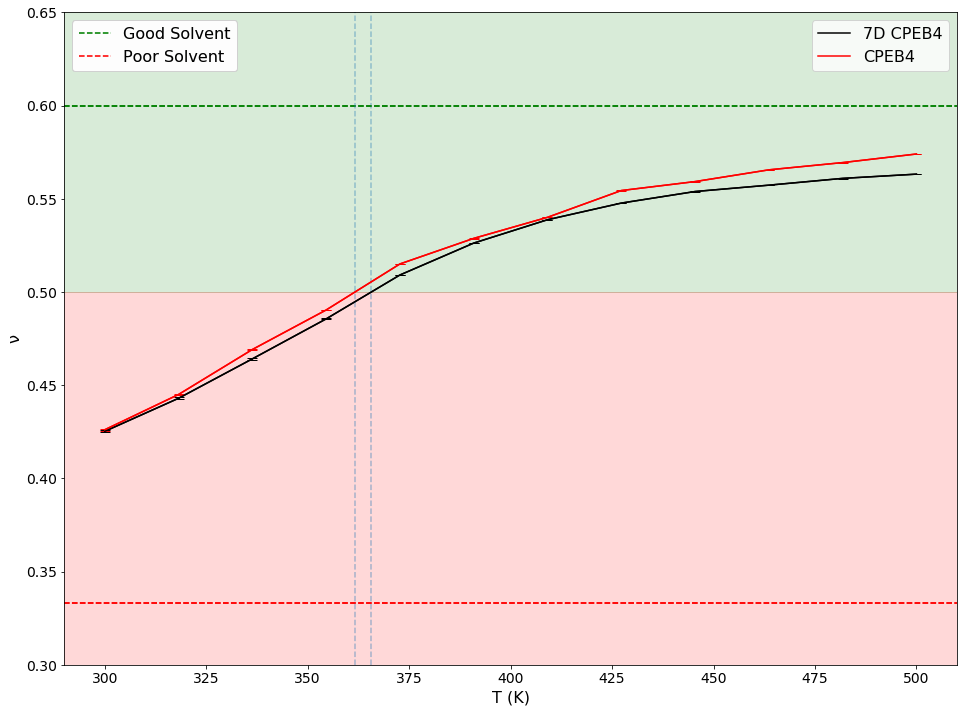

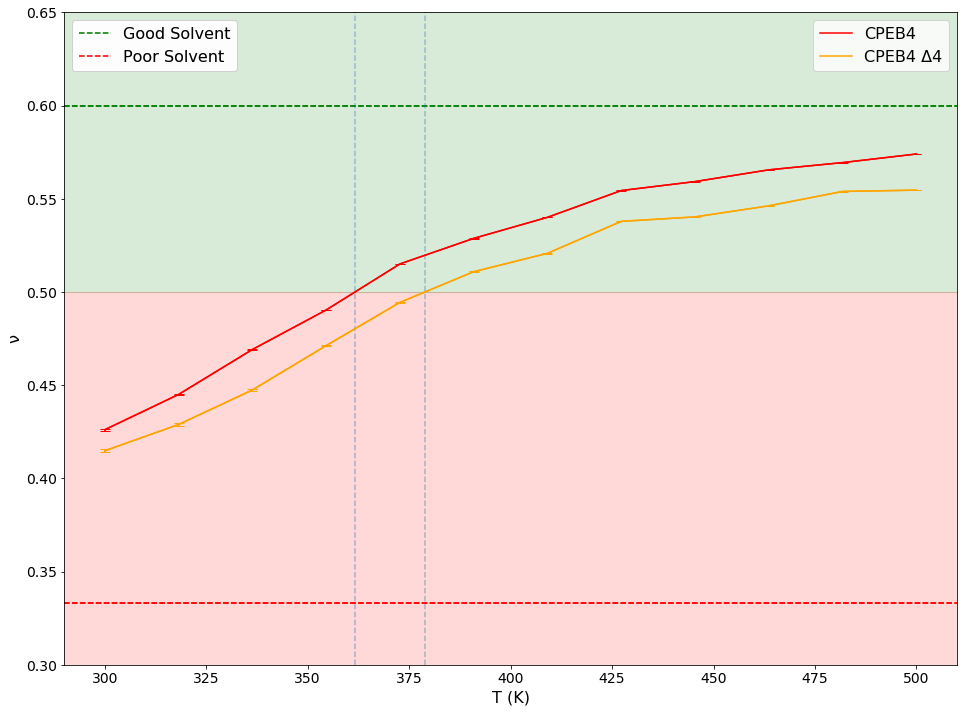

In [14]:
plotty.clean()
plotty.plot('flory', 0, plot_id=0, label='12D CPEB4 Δ4')
plotty.plot('flory', 1, plot_id=1, label='7D CPEB4', color='black')
plotty.plot('flory', 2, plot_id=1, label='CPEB4', color='red')
plotty.plot('flory', 3, plot_id=0, label='CPEB4 Δ4')
plotty.plot('flory', 2, plot_id=100, label='CPEB4', color='red')
plotty.plot('flory', 3, plot_id=100, label='CPEB4 Δ4', color='orange')

Followed by the **rg's** using the critical temperatures from where flory's exponent is equal to 0.5

red
orange


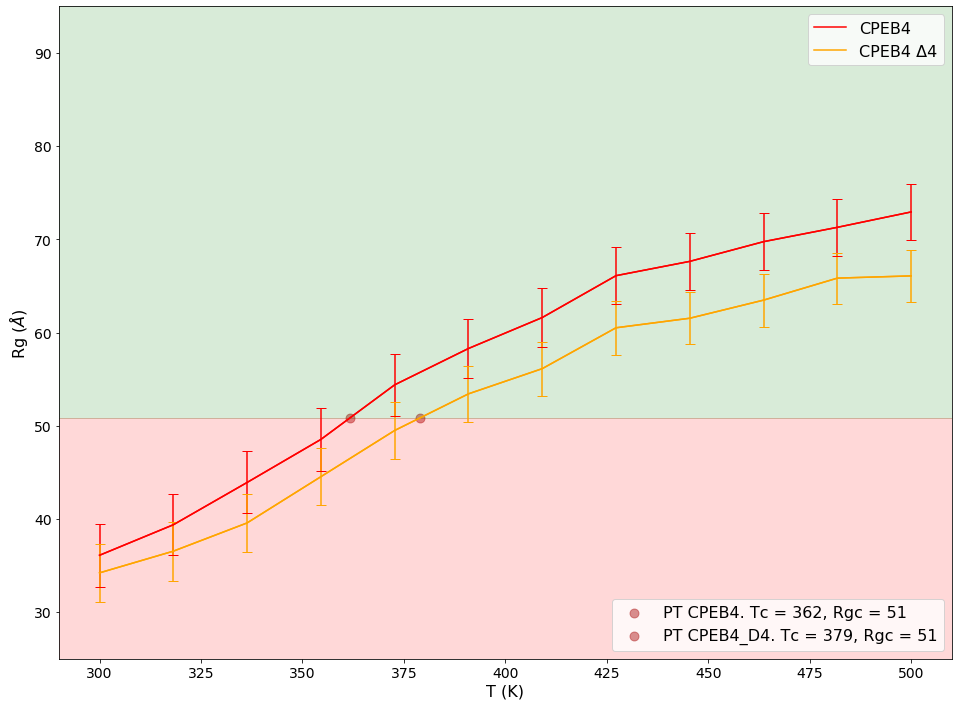

In [16]:
# plotty.plot('rg', 0, plot_id=2, label='12D CPEB4 Δ4')
# plotty.plot('rg', 1, plot_id=3, label='7D CPEB4', color='black')
plotty.plot('rg', 2, plot_id=101, label='CPEB4', color='red')
plotty.plot('rg', 3, plot_id=101, label='CPEB4 Δ4', color='orange')

Finally the **contact and distance maps** for all analogs:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


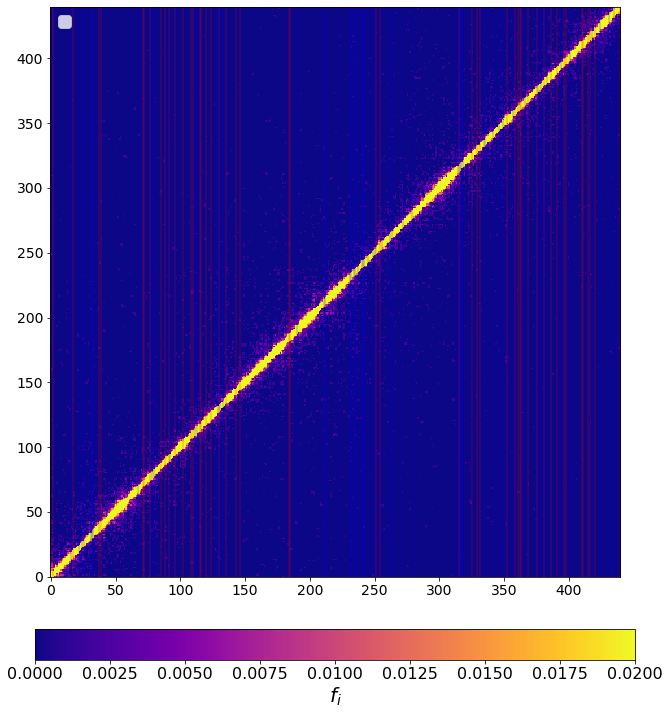

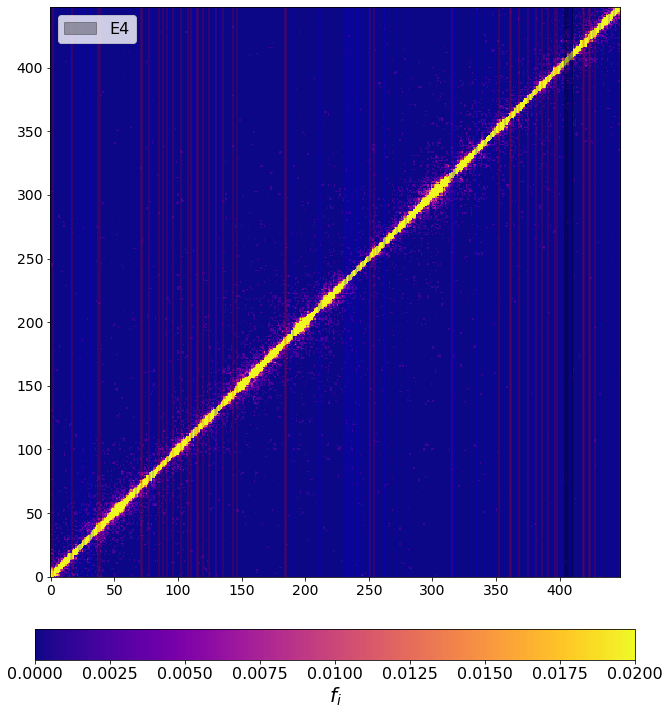

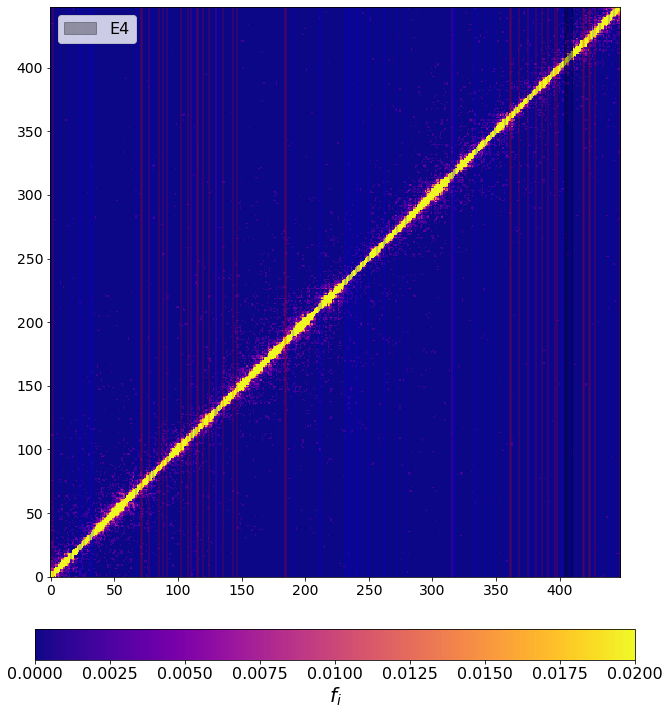

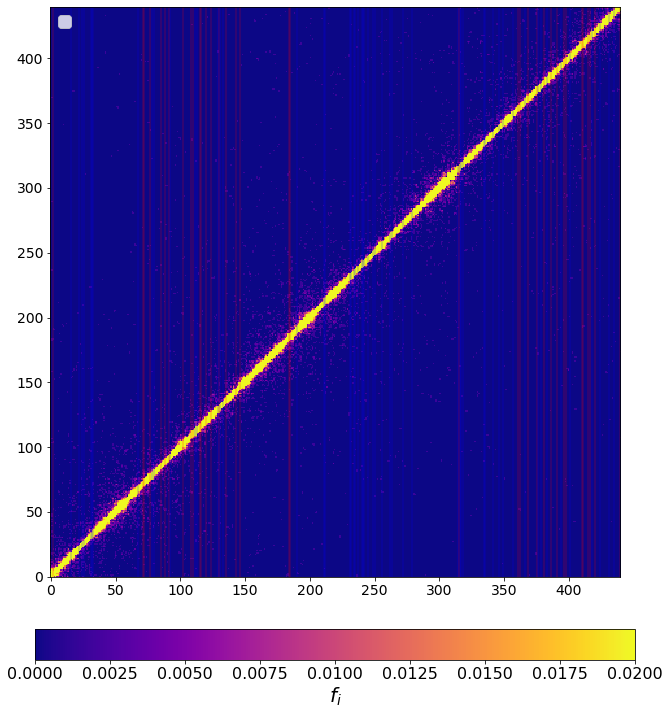

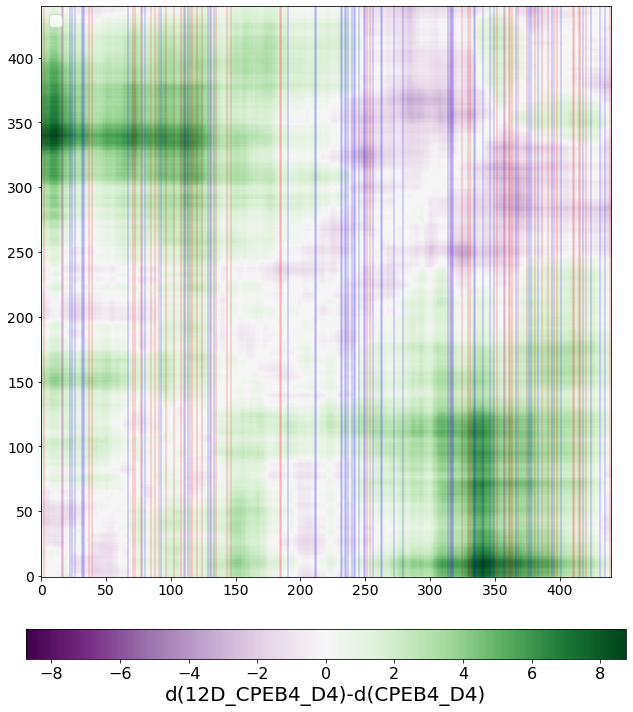

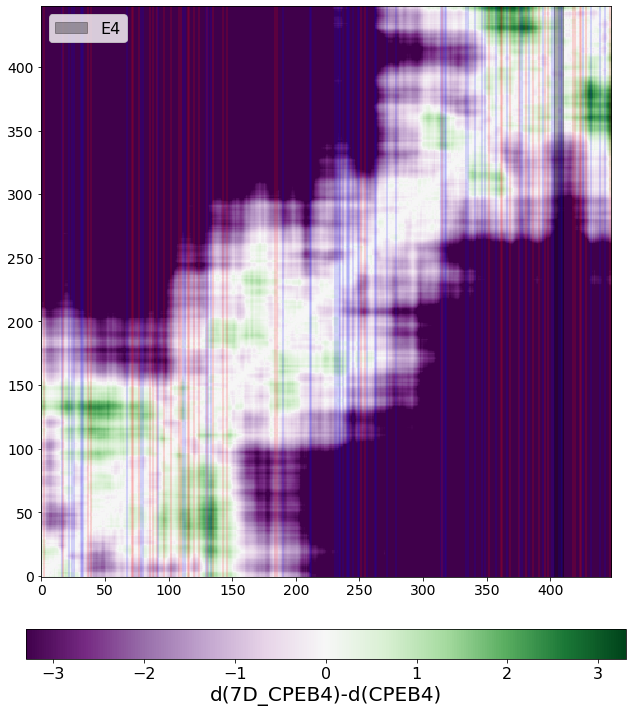

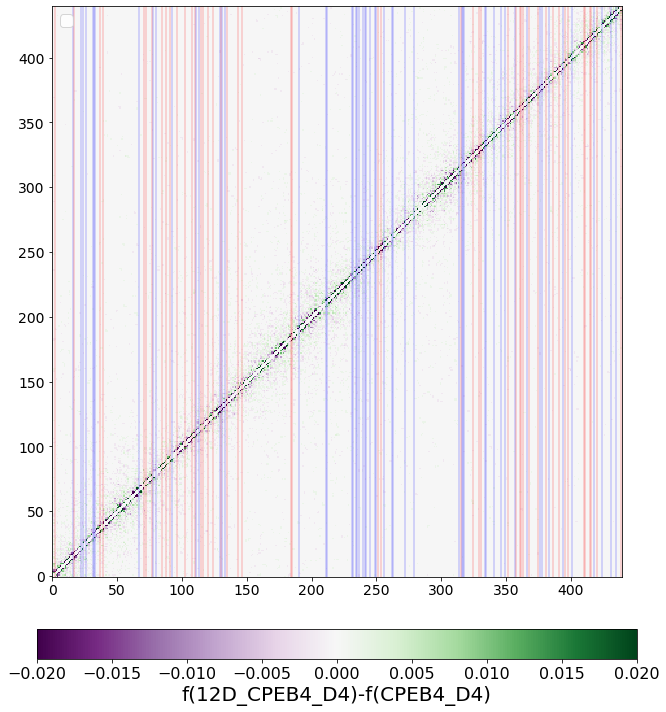

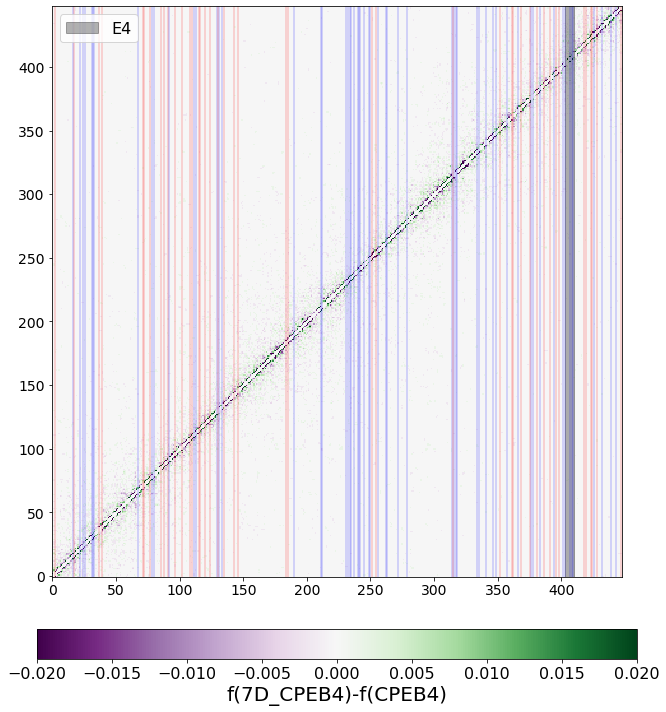

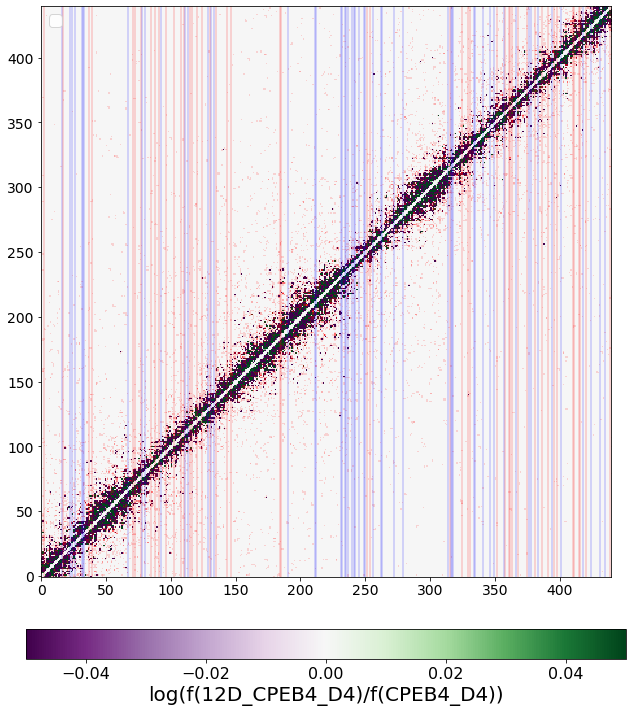

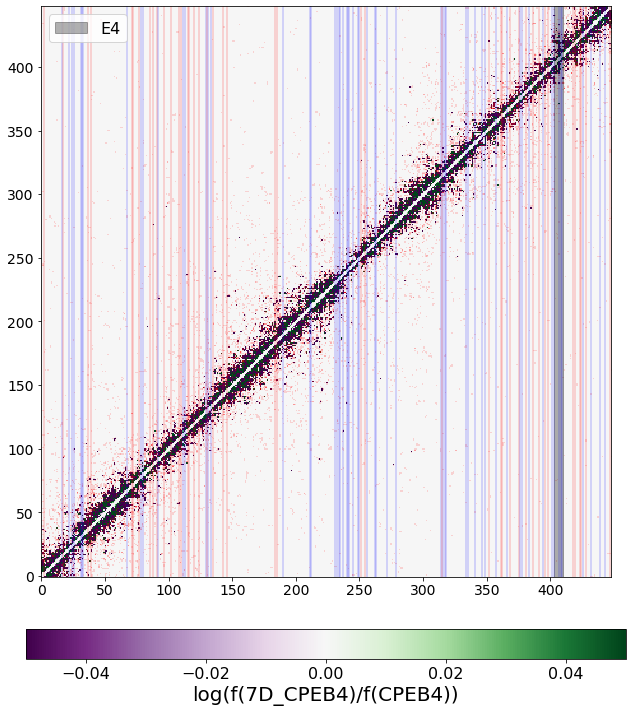

In [9]:
plotty.clean()

plotty.plot('distance_map', 0, plot_id="A", contacts=True)
plotty.plot('distance_map', 1, plot_id="B", contacts=True)
plotty.plot('distance_map', 2, plot_id="C", contacts=True)
plotty.plot('distance_map', 3, plot_id="D", contacts=True)

plotty.plot('distance_map', 0, plot_id=4, contacts=False, index2=3)
plotty.plot('distance_map', 1, plot_id=5, contacts=False, index2=2)

plotty.plot('distance_map', 0, plot_id=6, label='12D CPEB4 Δ4', contacts=True, index2=3)
plotty.plot('distance_map', 1, plot_id=7, label='7D CPEB4', contacts=True, index2=2)

plotty.plot('distance_map', 0, plot_id=8, label='12D CPEB4 Δ4', contacts=True, index2=3, log=True)
plotty.plot('distance_map', 1, plot_id=9, label='7D CPEB4', contacts=True, index2=2, log=True)

### 2. Optimization of the difference between Rg of analogs (REQUIRES TESTING)

Here we want to sort of maximize the difference between radius of gyrations of CPEB4 analogs at a fixed temperature to define what experimental parameters are to be studied when considering criticality. We can minimize using my own methods :

In [ ]:
minimizer = analysis.Analysis(oliba_wd=None)
min_result = minimizer.minimize_I_ls(a_dir='/home/adria/data/prod/lammps/12D_CPEB4_D4/x1/1.0ls-100I-80e', b_dir='/home/adria/data/prod/lammps/CPEB4_D4/x1/1.0ls-100I-80e')

<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 5 frames, 440 atoms, 1 residues, and uni

### 3. Multichain simulations analysis

Only available analysis is **rg**, **interchain contacts** and **binodals**. Therefore, for the **radius of gyration**:

Swapping progress : 99.70 %None
None


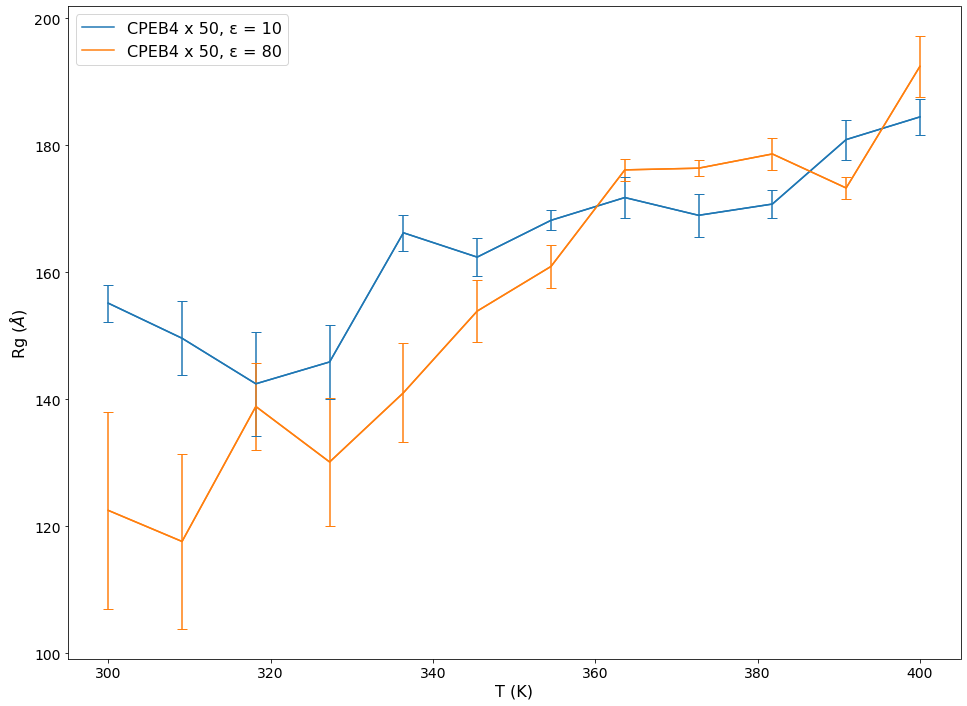

In [11]:
multi_plotty = plotter.Plotter()
multi_plotty.plot('rg', 5, plot_id=10, label='CPEB4 x 50, ε = 10')
multi_plotty.plot('rg', 6, plot_id=10,  label='CPEB4 x 50, ε = 80')

For the **interchain contacts**

In [ ]:
multi_plotty = plotter.Plotter()

multi_plotty.plot('distance_map',6, plot_id=11,)
multi_plotty.plot('distance_map',6, plot_id=12, contacts=True)

And finally for **the binodals**:

In [ ]:
densities = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/CPEB4x50/1.0ls-100I-80e')
densities.density_from_clusters(T=3)